## Notebook for Fig. 3 of the paper

Sets 0, 1, and 2 correspond to the 2-, 5-, and 7-parameter models discussed in the paper. We begin by initializing the dictionaries "up," "middle," and "down" to store the 5th, 50th, and 95th percentiles, respectively, of the various distributions used in the analysis.

In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import pickle
import scipy 
from tqdm import tqdm
import os
import emcee

up = {}
middle = {}
down = {}

sets=['s0','s1','s2']

At N=1 (where N is the number of events), our hierarchical inference framework requires loading the result of each individual event and computing their average. The MCMC samples that are meant to be placed in the "Injection_results" folder can be downloaded from the Zenodo repository.

In [2]:
### Point at N = 1

for case in sets:
    
    temp_up = []
    temp_middle = []
    temp_down = []

    k = 0
    
    for event in range(20):

        k = k + 1    
        
        temp = np.loadtxt('Injection_results/'+case+'_'+str(event)+'.dat')[:,3]

        temp_up.append( np.percentile(temp,95)) 
        temp_middle.append( np.percentile(temp,50)) 
        temp_down.append( np.percentile(temp,5)) 

    up['1_'+case] = np.mean(temp_up) 
    middle['1_'+case] =  np.mean(temp_middle) 
    down['1_'+case] =  np.mean(temp_down) 

At N=20, we perform a full hierarchical inference with 20 events, and no averaging is required.

In [3]:
### Point at N = 20

for case in sets:
    
    temp = np.loadtxt('Injection_results/'+case+'_hierarchical.dat')[:,1]
    
    up['20_'+case] = np.percentile( temp,95 )
    middle['20_'+case] = np.percentile( temp,50 )
    down['20_'+case] = np.percentile( temp,5 )


The following cells correspond to N=10, 15, 5, and 3, respectively. For each value of N, we perform 100 hierarchical inferences, each involving N events randomly selected from the total pool of 20. The loop "for file in files" loads the results of these 100 analyses and averages over them.

In [4]:
### Point at N = 10

files = os.listdir('Injection_results/hierarchical/')

for case in sets:

    temp_up = []
    temp_middle = []
    temp_down = []

    k = 0
    
    for file in files:
        if not file[:5] == case+'_10':
            continue

        k = k + 1    
        
        temp = np.loadtxt('Injection_results/hierarchical/'+file)[:,1]

        temp_up.append( np.percentile(temp,95)) 
        temp_middle.append( np.percentile(temp,50)) 
        temp_down.append( np.percentile(temp,5)) 

    up['10_'+case] = np.mean(temp_up) 
    middle['10_'+case] =  np.mean(temp_middle) 
    down['10_'+case] =  np.mean(temp_down) 

In [5]:
### Point at N = 15

for case in sets:

    temp_up = []
    temp_middle = []
    temp_down = []

    k = 0
    
    for file in files:
        if not file[:5] == case+'_15':
            continue

        k = k + 1    
        
        temp = np.loadtxt('Injection_results/hierarchical/'+file)[:,1]

        temp_up.append( np.percentile(temp,95)) 
        temp_middle.append( np.percentile(temp,50)) 
        temp_down.append( np.percentile(temp,5)) 

    up['15_'+case] = np.mean(temp_up) 
    middle['15_'+case] =  np.mean(temp_middle) 
    down['15_'+case] =  np.mean(temp_down) 

In [6]:
### Point at N = 5

for case in sets:

    temp_up = []
    temp_middle = []
    temp_down = []
    
    k = 0

    for file in files:
        if not file[:5] == case+'_5_':
            continue

        k = k + 1   
        
        temp = np.loadtxt('Injection_results/hierarchical/'+file)[:,1]

        temp_up.append( np.percentile(temp,95)) 
        temp_middle.append( np.percentile(temp,50)) 
        temp_down.append( np.percentile(temp,5)) 

    up['5_'+case] = np.mean(temp_up) 
    middle['5_'+case] =  np.mean(temp_middle) 
    down['5_'+case] =  np.mean(temp_down) 

In [7]:
### Point at N = 3

for case in sets:

    temp_up = []
    temp_middle = []
    temp_down = []
    
    k = 0

    for file in files:
        if not file[:5] == case+'_3_':
            continue

        k = k + 1   
        
        temp = np.loadtxt('Injection_results/hierarchical/'+file)[:,1]

        temp_up.append( np.percentile(temp,95)) 
        temp_middle.append( np.percentile(temp,50)) 
        temp_down.append( np.percentile(temp,5)) 

    up['3_'+case] = np.mean(temp_up) 
    middle['3_'+case] =  np.mean(temp_middle) 
    down['3_'+case] =  np.mean(temp_down) 

The MCMC samples above were obtained using the Fisher matrix approximation. We compare these with results from a full parameter estimation analysis performed under the zero-noise approximation.

In [8]:
full_PE_samples = []

for run_number in range(1,11):

    reader_PE = emcee.backends.HDFBackend('Full_PE_results/sampler_'+str(run_number)+'.hdf')

    samples_PE = reader_PE.get_chain(discard=1500, flat=True,thin=50)
    
    full_PE_samples.append(samples_PE)

full_PE_samples = np.array(full_PE_samples)[:,:,1]

c3_full_PE = full_PE_samples.flatten()

The following cell creates the final plot

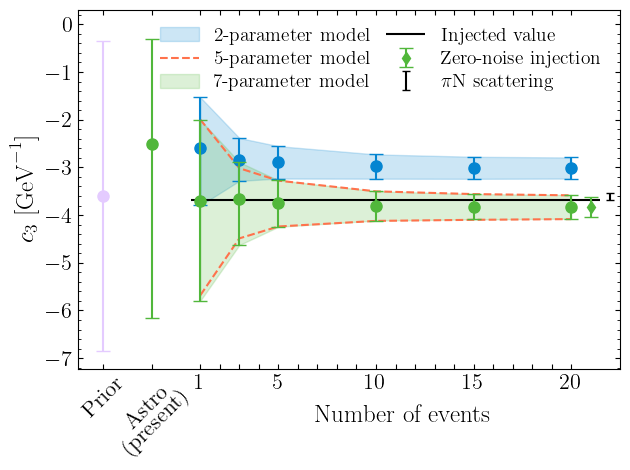

In [9]:
from matplotlib import cm, colors
import matplotlib
plt.rcParams['text.usetex'] = True
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fontsize = 18

fig, ax = plt.subplots()

##

case = 's0'

for N in [1,3,5,10,15,20]:

    yerr_low = middle[str(N)+'_'+case] - down[str(N)+'_'+case]

    yerr_up = up[str(N)+'_'+case] - middle[str(N)+'_'+case]

    ax.errorbar(N,y=middle[str(N)+'_'+case],yerr=np.array([yerr_low,yerr_up]).reshape(2,1) ,fmt='o', markersize=8, capsize=5,alpha=1,color='xkcd:cerulean',zorder=50)

    
case = 's2'
   
for N in [1,3,5,10,15,20]:

    yerr_low = middle[str(N)+'_'+case] - down[str(N)+'_'+case]

    yerr_up = up[str(N)+'_'+case] - middle[str(N)+'_'+case]

    ax.errorbar(N,y=middle[str(N)+'_'+case],yerr=np.array([yerr_low,yerr_up]).reshape(2,1) ,fmt='o', markersize=8, capsize=5,alpha=1,color='xkcd:leafy green',zorder=100)

case = 's0'
up_plot = []
down_plot = []

for N in [1,3,5,10,15,20]:
    up_plot.append( up[str(N)+'_'+case] )
    down_plot.append( down[str(N)+'_'+case] )

ax.fill_between( [1,3,5,10,15,20],up_plot,down_plot,alpha = 0.2,color='xkcd:cerulean',label=r'$\textrm{2-parameter model}$')


case = 's1'
up_plot = []
down_plot = []

for N in [1,3,5,10,15,20]:
    up_plot.append( up[str(N)+'_'+case] )
    down_plot.append( down[str(N)+'_'+case] )

ax.plot( [1,3,5,10,15,20],up_plot,color='xkcd:pinkish orange',alpha=1,linestyle='dashed',label=r'$\textrm{5-parameter model}$')

ax.plot( [1,3,5,10,15,20],down_plot,color='xkcd:pinkish orange',alpha=1,linestyle='dashed')


case = 's2'
up_plot = []
down_plot = []

for N in [1,3,5,10,15,20]:
    up_plot.append( up[str(N)+'_'+case] )
    down_plot.append( down[str(N)+'_'+case] )

ax.fill_between( [1,3,5,10,15,20],up_plot,down_plot,color='xkcd:leafy green',alpha = 0.2,label=r'$\textrm{7-parameter model}$')


##

ax.errorbar(-4,y=-3.61,yerr=3.25 ,fmt='o', markersize=8, capsize=5,color='xkcd:pale lilac')
    
ax.errorbar(-1.5,y=-2.52,yerr=np.array([3.63,2.21]).reshape(2,1) ,fmt='o', markersize=8, capsize=5,color='xkcd:leafy green')

ax.hlines(-3.67540915,xmin=0.5,xmax=21.5,color='black',label=r'$\textrm{Injected value}$')

ax.set_ylim(top = 0.3,bottom = -3.61*2)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y',which='both',direction='in',labelsize=fontsize-2,left=True,right=True)


ax.set_xlabel(r'$\ \ \ \textrm{Number of events}$',fontsize=fontsize)
ax.set_ylabel(r'$c_3 \ \textrm{[GeV}^{-1}\textrm{]}$',fontsize=fontsize)

ax.set_xticks([-4,-1.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

ax.set_xticklabels([r'$\textrm{Prior}$',r'$\textrm{Astro} \\ \textrm{(present)}$','$1$',
                    '','','','$5$',
                    '','','','','$10$',
                    '','','','','$15$',
                    '','','','','$20$'])

ax.tick_params(axis='x',which='major',direction='in',labelsize=fontsize-2,bottom=True,top=True)


ticks = ax.get_xticklabels()
ticks[0].set_rotation(45)
ticks[1].set_rotation(45)

ax.xaxis.set_label_coords(0.6, -0.1)

ax.set_xlim(right = 22.5)


yerr_low_PE = np.percentile(c3_full_PE,50) - np.percentile(c3_full_PE,5)
yerr_up_PE  = np.percentile(c3_full_PE,95) - np.percentile(c3_full_PE,50)
ax.errorbar(21,y=np.percentile(c3_full_PE,50),yerr=np.array([yerr_low_PE,yerr_up_PE]).reshape(2,1) ,fmt='d', markersize=6, capsize=5,alpha=1,color='xkcd:leafy green',zorder=100,
           label=r'$\textrm{Zero-noise injection}$')


ax.errorbar(22,y=-3.61,yerr=0.05*1.645 ,fmt='o', markersize=0, capsize=3,color='black',alpha=1,label=r'$\pi \textrm{N} \ \textrm{scattering}$')

ax.legend(fontsize=fontsize-4,ncol=2, columnspacing=0.8, labelspacing=0.3,frameon=False)


plt.tight_layout()

plt.savefig('figures/convergence_updated2.pdf',bbox_inches='tight')

The last cell below stores the source data for the figure in a txt file

In [10]:
with open('source_data/fig3.txt', 'w') as f:
    f.write("# --- Main Plot Data ---\n")
    f.write("N\tcase\tmiddle\tup\tdown\n")
    for case in sets:
        for N in [1, 3, 5, 10, 15, 20]:
            m = middle[str(N)+'_'+case]
            u = up[str(N)+'_'+case]
            d = down[str(N)+'_'+case]
            f.write(f"{N}\t{case}\t{m:.6f}\t{u:.6f}\t{d:.6f}\n")
    
    f.write("\n# --- Zero-noise Injection ---\n")
    f.write("percentile_5\tpercentile_50\tpercentile_95\tyerr_low\tyerr_up\n")
    p5, p50, p95 = np.percentile(c3_full_PE, [5, 50, 95])
    yerr_low_PE = p50 - p5
    yerr_up_PE = p95 - p50
    f.write(f"{p5:.6f}\t{p50:.6f}\t{p95:.6f}\t{yerr_low_PE:.6f}\t{yerr_up_PE:.6f}\n")
    
    f.write("\n# --- PiN Scattering ---\n")
    f.write("y\tyerr\n")
    y = -3.61
    yerr = 0.05 * 1.645
    f.write(f"{y:.6f}\t{yerr:.6f}\n")
    
    f.write("\n# --- Prior ---\n")
    f.write("x\ty\tyerr\n")
    prior_x = -4
    prior_y = -3.61
    prior_yerr = 3.25
    f.write(f"{prior_x:.1f}\t{prior_y:.6f}\t{prior_yerr:.6f}\n")
    
    f.write("\n# --- Astro (Present) ---\n")
    f.write("x\ty\tyerr_low\tyerr_up\n")
    astro_x = -1.5
    astro_y = -2.52
    astro_yerr_low = 3.63
    astro_yerr_up = 2.21
    f.write(f"{astro_x:.1f}\t{astro_y:.6f}\t{astro_yerr_low:.6f}\t{astro_yerr_up:.6f}\n")